In [64]:
%matplotlib inline
import re
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from nltk.corpus import stopwords
from collections import Counter
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/xiaoyuwang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [65]:
df = pd.read_csv("data-cleaned.csv",usecols = ["idposts","type"])
# print(df.shape)
df.head()

,idposts,type
0,NaN,INFJ
1,NaN,INFJ
2,enfp and intj moments sportscenter not top ...,INFJ
3,what has been the most lifechanging experience...,INFJ
4,on repeat for most of today,INFJ


<AxesSubplot:xlabel='index'>

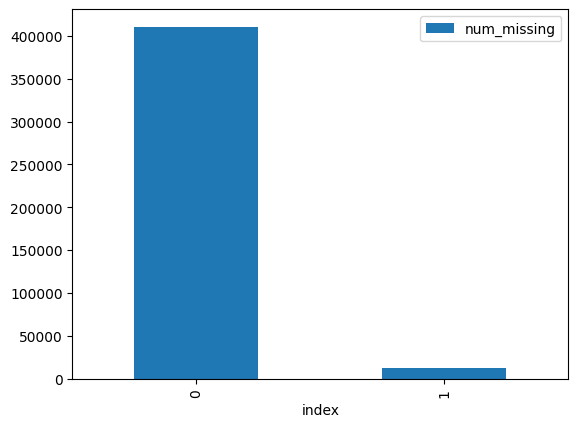

In [66]:
# first create missing indicator for features with missing data
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)

    if num_missing > 0:  
#        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

In [67]:
# drop rows with a lot of missing values.
num = 0
ind_missing = df[df['num_missing'] > num].index
df_less_missing_rows = df.drop(ind_missing, axis=0)
df_less_missing_rows.shape

(410434, 4)

Number of comments per category

In [68]:
df_less_missing_rows.sample(n=10)

,idposts,type,idposts_ismissing,num_missing
311454,clown,ISFJ,False,0
349324,did you see that that was horrifying,INTP,False,0
238613,intp wanted some privacy for the weekend so he...,INTJ,False,0
216515,i knew itd happen but me too,INFJ,False,0
307844,i bolded that last statement because i think t...,INTJ,False,0
177552,im and i still feel like this sometimes even ...,ISFJ,False,0
115953,the most mindblowingly awesome for enfp job iv...,ENFP,False,0
173139,clearly the dog is trying to up his dance skil...,INTP,False,0
142841,thank you for the great replies i am so inexpe...,INFP,False,0
15335,if you do you are going to have to wait a mont...,ENFJ,False,0


In [93]:
df_raw = df_less_missing_rows.copy().drop(columns=['idposts_ismissing', 'num_missing'])

# df_raw.to_csv("raw_data.csv",index = False)

In [97]:
# load stopwords
stop_words = set(stopwords.words('english'))
#for word in ['im','dont','like','think','people','would','know','really','get','ive','one','time']:
for word in ['im','like','people','would','know','really','get','ive','one','time','u','think',
             'enfj','enfp','entj','entp','esfj','esfp','estj','estp',
             'infj','infp','intj','intp','isfj','isfp','istj','istp',
             'enfjs','enfps','entjs','entps','esfjs','esfps','estjs','estps',
             'infjs','infps','intjs','intps','isfjs','isfps','istjs','istps',]:
    stop_words.add(word)
# filter can be changed.

df_stop_words = pd.DataFrame(stop_words, columns=["excluded_words"])
# df_stop_words.to_csv('stop_words.csv',index=False)
df_stop_words

,excluded_words
0,some
1,weren
2,you've
3,while
4,wouldn't
...,...
218,m
219,istps
220,do
221,not


In [71]:
def freqWords(dfRaw,nCommons,stopWords):
    reWordlist = []
    for typeid,type_df in dfRaw.groupby("type"):
        sentence_list = type_df.idposts
        wordlist = []
        for sentence in sentence_list:
            for word in sentence.split():
                if word not in stopWords:
                    wordlist.append(word)
        c = Counter(wordlist)       
        print(typeid,[word for word,freq in c.most_common(nCommons)])
#        print(typeid,c.most_common(nCommons))
        for word,freq in c.most_common(nCommons):
            reWordlist.append(word)
#    print(reWordlist)

    keyWordlist = []
    for x in reWordlist:
        if x not in keyWordlist:
            keyWordlist.append(x)
    
#    print(res,len(res)) 
    return wordlist, keyWordlist, reWordlist

# function to retrun 
# wordlist: all filtered words 
# reWordlist: key words for all with repeat and key_words_list without repeat. 
# df_toxic: contains count and freq.(percent) happen over all common words without repeat.

# check

In [72]:
N_Commons = 60

wordlist,key_words_list,reKey_wordlist = freqWords(df_raw,N_Commons,stop_words)

ENFJ ['dont', 'feel', 'love', 'much', 'well', 'say', 'good', 'something', 'things', 'see', 'way', 'want', 'someone', 'also', 'always', 'friends', 'type', 'make', 'thats', 'could', 'lot', 'even', 'go', 'youre', 'lol', 'thing', 'person', 'right', 'never', 'need', 'life', 'yes', 'find', 'though', 'going', 'friend', 'pretty', 'sure', 'first', 'thanks', 'actually', 'said', 'cant', 'us', 'still', 'best', 'many', 'sometimes', 'take', 'work', 'relationship', 'others', 'read', 'got', 'around', 'thought', 'id', 'thank', 'try', 'back']
ENFP ['dont', 'love', 'feel', 'much', 'well', 'things', 'say', 'good', 'also', 'way', 'want', 'see', 'something', 'lot', 'always', 'thats', 'youre', 'even', 'type', 'friends', 'could', 'go', 'make', 'someone', 'thing', 'life', 'never', 'though', 'actually', 'yes', 'cant', 'sure', 'find', 'pretty', 'going', 'right', 'lol', 'first', 'person', 'friend', 'yeah', 'need', 'thanks', 'got', 'thought', 'best', 'w', 'sometimes', 'oh', 'around', 'still', 'id', 'mean', 'said',

In [73]:
count = dict(Counter(word for word in reKey_wordlist))
keys = count.keys()
vals = np.fromiter(count.values(), dtype=float)
percent = vals / sum(vals)

df_toxic = pd.DataFrame(count.items(),columns = ['words','scores'])
df_toxic['percent'] = percent

In [74]:
counts = []
typelist = []
for typeid,df_by_type in df_raw.groupby("type"):
    typelist.append(typeid)
    counts.append(df_by_type.shape[0])

df_stats = pd.DataFrame({"type":typelist,"counts":counts})

In [75]:
## Conclusion Flag for all pre-data,haven't initial yet. 
df_toxic

,words,scores,percent
0,dont,16,0.016667
1,feel,16,0.016667
2,love,16,0.016667
3,much,16,0.016667
4,well,16,0.016667
...,...,...,...
92,may,1,0.001042
93,makes,1,0.001042
94,use,1,0.001042
95,long,1,0.001042


In [76]:
df_stats

,type,counts
0,ENFJ,9111
1,ENFP,32037
2,ENTJ,11007
3,ENTP,33027
4,ESFJ,1993
5,ESFP,2152
6,ESTJ,1881
7,ESTP,4234
8,INFJ,69930
9,INFP,86833


In [77]:
def scoreGen(nCommons,dfRaw,dfToxic):
    arr0 = []
    for typeid,type_df in dfRaw.groupby("type"):
        sentence_list = type_df.idposts
        wordlist = []
        for sentence in sentence_list:
            for word in sentence.split():
                if word not in stop_words:
                    wordlist.append(word)
        c = Counter(wordlist)    
        typelist = []
        freqlist = []
        for word,freq in c.most_common(nCommons):
            typelist.append(word) 
            freqlist.append(freq)
#        print(typelist,freqlist)
        dfToxic['Dummy'] = dfToxic.words.isin(typelist).astype(int)
        dfToxic.loc[dfToxic['Dummy'] == 1, 'freq'] = freqlist
        dfToxic.loc[dfToxic['Dummy'] == 0, 'freq'] = 0
        score = np.sum(dfToxic['percent'] * dfToxic['Dummy'] + dfToxic['freq'] / np.sum(dfToxic['freq']))
    
        arr0.append(score)
            
    return arr0

In [78]:
nCommons = np.array([34,20,13,27,40,56,17,4,23,38])
# can be randomly chosen
score_matrix = np.zeros((16,1)) 

df_r = df_raw.copy()
df_t = df_toxic.copy()

for i in range(0,len(nCommons)):
    arr1 = scoreGen(nCommons[i],df_r,df_t) # + score_matrix
    score_matrix = np.insert(score_matrix, i, arr1, axis=1)

# print(np.cumsum(score_matrix) / len(nCommons))
score_matrix = np.cumsum(score_matrix,axis = 1)

scores = np.array([row[len(nCommons) - 1] for row in score_matrix]) / len(nCommons)

if all(v == 1 for v in scores):
    print("Identical Label happened")
else:
    print(scores)

# type scores type-score ordered by type.

[1.43739583 1.4396875  1.43875    1.44208333 1.4146875  1.42979167
 1.43458333 1.43510417 1.443125   1.4409375  1.44166667 1.44333333
 1.44020833 1.43833333 1.4421875  1.43927083]


In [79]:
counts = []
typelist = []
for typeid,df_by_type in df_raw.groupby("type"):
    typelist.append(typeid)
    counts.append(df_by_type.shape[0])

df_scores = pd.DataFrame({"type":typelist,"scores":scores,"counts":counts})

# df_scores

# df_scores.to_csv('df_scores.csv',index = False)

In [ ]:
# Flag for type-score generation and all pre-data under the big-frame with 60 common-samples.

# Now begin to process dataframe for analzing. 

In [80]:
nCommons = 12
wordlist,key_words_list,reKey_wordlist = freqWords(df_raw,nCommons,stop_words)

ENFJ ['dont', 'feel', 'love', 'much', 'well', 'say', 'good', 'something', 'things', 'see', 'way', 'want']
ENFP ['dont', 'love', 'feel', 'much', 'well', 'things', 'say', 'good', 'also', 'way', 'want', 'see']
ENTJ ['dont', 'well', 'see', 'type', 'good', 'much', 'say', 'want', 'things', 'also', 'youre', 'way']
ENTP ['dont', 'well', 'much', 'good', 'see', 'way', 'say', 'things', 'youre', 'something', 'also', 'type']
ESFJ ['dont', 'type', 'love', 'lot', 'feel', 'much', 'things', 'good', 'well', 'way', 'though', 'something']
ESFP ['dont', 'well', 'feel', 'say', 'type', 'want', 'youre', 'see', 'good', 'love', 'much', 'thats']
ESTJ ['dont', 'want', 'well', 'say', 'something', 'love', 'things', 'type', 'see', 'much', 'make', 'never']
ESTP ['dont', 'well', 'type', 'good', 'see', 'much', 'way', 'say', 'want', 'something', 'go', 'also']
INFJ ['dont', 'feel', 'much', 'love', 'well', 'things', 'good', 'say', 'way', 'see', 'something', 'want']
INFP ['dont', 'feel', 'love', 'much', 'well', 'good', 'th

In [81]:
columns_names = [col for col in key_words_list]
frames = [df_raw, pd.DataFrame(0, index=df_raw.index, columns=columns_names)]
df_initial = pd.concat(frames,axis=1)

df_initial = df_initial.drop(columns=['idposts','type'])

for word in key_words_list:
    df_initial[word] = df_raw.idposts.str.count(word)
    
df_initial = df_initial.drop(columns = ['type'])
df_hot = df_initial.loc[~(df_initial==0).all(axis=1)]

In [82]:
type_list = []
for idx in df_hot.index:
    type_list.append(df_raw.loc[idx]['type'])

# slightly slow

In [83]:
df_hot['type'] = type_list

# df_hot is very sparse.

# df_hot.to_csv('sparse_data.csv', index=False)

<ipython-input-83-d28c09847ef0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hot['type'] = type_list


In [84]:
def create_type_list(df_overall,type_list):
    df_list = []
    for idx in range(0,len(type_list)):
        df_list.append(df_overall[df_overall['type'] == type_list[idx]])

    return df_list
# return a list of dataframe with type

def sample_word_counts(df_to_break,batch_size):
    lst = [df_to_break.iloc[i:i + batch_size] for i in range(0,len(df_to_break) - batch_size + 1,batch_size)]
    wordcount = []
    for idx in range(0,len(lst)):
        temp = []
        temp = lst[idx].groupby(['type']).sum()
        temp = temp.add_suffix('').reset_index()
        wordcount.append(temp)
    
    return wordcount
# return a list of frame with the same type but sum of the small batch       

In [85]:
type_list = ['INFJ','INFP','INTJ','INTP',
             'ENFJ','ENFP','ENTJ','ENTP',
             'ISFJ','ISFP','ISTJ','ISTP',
             'ESFJ','ESFP','ESTJ','ESTP']

df_list_type = []

df_list_type = create_type_list(df_hot,type_list)

In [86]:
batchsize = 50
df_sample = df.copy()
df_sample = df[0:0] # initial

for idx in range(0,16):
    to_append = []
    to_append = sample_word_counts(df_list_type[idx],batchsize)
    df_sample = df_sample.append(to_append,ignore_index=True)

In [87]:
df_sample_copy = df_sample.drop(columns = ['idposts','idposts_ismissing','num_missing'])

df_sample_copy

# df_sample_copy.to_csv('batched_data.csv',index = False)

,type,dont,feel,love,much,well,say,good,something,things,...,also,youre,lot,though,thats,make,never,go,always,even
0,INFJ,14.0,9.0,7.0,3.0,5.0,5.0,11.0,2.0,3.0,...,7.0,3.0,2.0,7.0,2.0,2.0,3.0,18.0,3.0,3.0
1,INFJ,11.0,7.0,2.0,4.0,0.0,4.0,3.0,3.0,5.0,...,3.0,6.0,3.0,7.0,3.0,5.0,1.0,19.0,4.0,5.0
2,INFJ,13.0,7.0,2.0,7.0,1.0,4.0,3.0,2.0,2.0,...,0.0,6.0,3.0,5.0,3.0,8.0,7.0,17.0,3.0,3.0
3,INFJ,4.0,9.0,5.0,7.0,4.0,4.0,6.0,1.0,1.0,...,2.0,0.0,3.0,7.0,2.0,4.0,2.0,22.0,4.0,0.0
4,INFJ,10.0,7.0,10.0,5.0,2.0,5.0,2.0,2.0,1.0,...,6.0,2.0,5.0,3.0,1.0,4.0,5.0,11.0,10.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5581,ESTP,11.0,2.0,6.0,1.0,4.0,4.0,2.0,2.0,4.0,...,1.0,4.0,2.0,3.0,5.0,7.0,2.0,14.0,3.0,4.0
5582,ESTP,15.0,4.0,3.0,5.0,12.0,8.0,3.0,5.0,4.0,...,1.0,4.0,3.0,1.0,4.0,5.0,4.0,16.0,8.0,2.0
5583,ESTP,10.0,7.0,1.0,5.0,9.0,10.0,6.0,1.0,2.0,...,8.0,0.0,4.0,6.0,2.0,7.0,2.0,13.0,5.0,7.0
5584,ESTP,9.0,3.0,1.0,5.0,6.0,6.0,6.0,3.0,2.0,...,4.0,1.0,3.0,10.0,2.0,4.0,2.0,25.0,3.0,3.0


In [88]:
score_list = []
for type_id in df_sample_copy.type:
    temp = []
    temp = df_scores.loc[df_scores['type'] == type_id, ['scores']].to_numpy()
    score_list.append(temp[0,0])

In [62]:
df_sample_copy['scores'] = score_list

# df_sample_copy.to_csv('data_processed.csv', index = False)

# df_sample_copy

In [ ]:
# data processed done!

In [63]:
df_sample_copy

,type,dont,feel,love,much,well,say,good,something,things,...,youre,lot,though,thats,make,never,go,always,even,scores
0,INFJ,14.0,9.0,7.0,3.0,5.0,5.0,11.0,2.0,3.0,...,3.0,2.0,7.0,2.0,2.0,3.0,18.0,3.0,3.0,1.443125
1,INFJ,11.0,7.0,2.0,4.0,0.0,4.0,3.0,3.0,5.0,...,6.0,3.0,7.0,3.0,5.0,1.0,19.0,4.0,5.0,1.443125
2,INFJ,13.0,7.0,2.0,7.0,1.0,4.0,3.0,2.0,2.0,...,6.0,3.0,5.0,3.0,8.0,7.0,17.0,3.0,3.0,1.443125
3,INFJ,4.0,9.0,5.0,7.0,4.0,4.0,6.0,1.0,1.0,...,0.0,3.0,7.0,2.0,4.0,2.0,22.0,4.0,0.0,1.443125
4,INFJ,10.0,7.0,10.0,5.0,2.0,5.0,2.0,2.0,1.0,...,2.0,5.0,3.0,1.0,4.0,5.0,11.0,10.0,6.0,1.443125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5581,ESTP,11.0,2.0,6.0,1.0,4.0,4.0,2.0,2.0,4.0,...,4.0,2.0,3.0,5.0,7.0,2.0,14.0,3.0,4.0,1.435104
5582,ESTP,15.0,4.0,3.0,5.0,12.0,8.0,3.0,5.0,4.0,...,4.0,3.0,1.0,4.0,5.0,4.0,16.0,8.0,2.0,1.435104
5583,ESTP,10.0,7.0,1.0,5.0,9.0,10.0,6.0,1.0,2.0,...,0.0,4.0,6.0,2.0,7.0,2.0,13.0,5.0,7.0,1.435104
5584,ESTP,9.0,3.0,1.0,5.0,6.0,6.0,6.0,3.0,2.0,...,1.0,3.0,10.0,2.0,4.0,2.0,25.0,3.0,3.0,1.435104


In [92]:
# This is a part of of the group project, no distributed. xiaoyuwang421@gmail.com